In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from interstellar import Tracks

Load grid

In [2]:
tracks = pd.read_csv('/home/ADF/ajl573/Data/interstellar_data/tracks_04c/tracks_04c_data.csv')
tracks.head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit,frac_evol,gradient
0,1,1.0,0.24,-0.1,2.3,0.101718,0.011245,5761.7700,0.750791,0.870776,4.558076,0.239467,0.010753,-0.101076,166.23111,0.010772,0.011245,0.000202
1,1,1.0,0.24,-0.1,2.3,0.115514,0.012770,5762.3745,0.752437,0.871547,4.557307,0.239379,0.010749,-0.101265,166.01129,0.010772,0.012770,0.000203
2,1,1.0,0.24,-0.1,2.3,0.132069,0.014600,5762.9420,0.754108,0.872343,4.556515,0.239273,0.010745,-0.101491,165.78581,0.010772,0.014600,0.000207
3,1,1.0,0.24,-0.1,2.3,0.151936,0.016796,5763.4970,0.755837,0.873174,4.555688,0.239144,0.010740,-0.101767,165.55112,0.010772,0.016796,0.000216
4,1,1.0,0.24,-0.1,2.3,0.175776,0.019431,5764.0933,0.757678,0.874056,4.554811,0.238991,0.010735,-0.102098,165.30295,0.010772,0.019431,0.000233


In [3]:
cond = (tracks['initial_MLT'] == 1.9) & (tracks['initial_Yinit']==0.28)
tracks = tracks.loc[cond]

Load Kepler-Gaia cross-match

In [4]:
from astropy.io import fits
from astropy.table import Table

In [5]:
def absolute_magnitude(magnitude, magnitude_err, distance, distance_err,
                       extinction=0., extinction_err=0.):
    abs_mag = magnitude + 5 - 5 * np.log10(distance) - extinction
    abs_mag_err = np.sqrt(magnitude_err**2 + 
                          25 * distance_err**2 / distance**2 / np.log(10)**2 +
                          extinction_err**2)
    return abs_mag, abs_mag_err

In [6]:
kepler_gaia_path = '/home/ADF/ajl573/Data/kepler_dr2_4arcsec.fits'

with fits.open(kepler_gaia_path) as hdul:
    data = hdul[1].data

In [7]:
kg = Table(data).to_pandas()
kg.head()

,solution_id,designation,source_id,random_index,gaia_ref_epoch,ra,ra_error,dec,dec_error,parallax,...,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist
0,1635721458409799680,Gaia DR2 2050233807328471424,2050233807328471424,689405501,2015.5,291.038681,0.035878,36.598031,0.047832,1.493916,...,-0.475,DSEP,0,0,0,10.126,9.667,9.559,none,0.156160
1,1635721458409799680,Gaia DR2 2050233601176543104,2050233601176543104,447382505,2015.5,291.043057,0.019919,36.593767,0.027553,2.678194,...,-0.233,DSEP,0,0,1,11.656,11.193,11.094,none,0.128262
2,1635721458409799680,Gaia DR2 2050230543159814656,2050230543159814656,1004823384,2015.5,291.055892,0.019394,36.559886,0.026621,1.723413,...,-0.947,DSEP,0,0,0,7.467,6.853,6.722,none,0.146787
3,1635721458409799680,Gaia DR2 2050230611879323904,2050230611879323904,1253666653,2015.5,291.095373,0.016886,36.564903,0.022993,1.183652,...,-0.157,DSEP,0,0,0,10.852,10.662,10.627,none,0.116420
4,1635721458409799680,Gaia DR2 2050231848829944320,2050231848829944320,298032508,2015.5,291.137620,0.019560,36.577344,0.025196,1.168913,...,-0.040,DSEP,1,1,1,13.665,13.262,13.118,conf,0.114502


Sort for nearest neighbours only.

In [8]:
kg.sort_values('kepler_gaia_ang_dist', inplace=True)
kg.drop_duplicates('kepid', inplace=True)
kg.head()

,solution_id,designation,source_id,random_index,gaia_ref_epoch,ra,ra_error,dec,dec_error,parallax,...,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist
140398,1635721458409799680,Gaia DR2 2082085009923554048,2082085009923554048,400731527,2015.5,300.901452,0.014509,44.597304,0.018708,0.689740,...,-1.422,DSEP,0,1,2,12.621,12.489,12.405,cand,0.000093
83596,1635721458409799680,Gaia DR2 2078411369777395840,2078411369777395840,1347491930,2015.5,298.129476,0.020465,41.858175,0.020936,0.718284,...,-0.760,DSEP,0,0,0,9.337,8.676,8.505,none,0.000121
224685,1635721458409799680,Gaia DR2 2132253075493311360,2132253075493311360,1569323160,2015.5,284.065241,0.053760,49.617373,0.048607,2.627499,...,-0.029,DSEP,0,0,0,14.176,13.510,13.268,none,0.000174
145172,1635721458409799680,Gaia DR2 2127010127316411136,2127010127316411136,1175200125,2015.5,290.857051,0.018359,44.874860,0.021892,1.260749,...,-0.112,DSEP,0,0,0,13.536,13.141,13.078,none,0.000184
186309,1635721458409799680,Gaia DR2 2107530354683483392,2107530354683483392,208472696,2015.5,282.789240,0.013163,47.012088,0.014739,0.787780,...,-0.102,DSEP,0,0,0,12.440,12.075,12.010,none,0.000225


Calc. distance and abs mag without extinctions

In [9]:
plx_offset = 0.05  # mas

kg['dist'] = 1000. / (kg['parallax'] + 0.05)

kg.head()

,solution_id,designation,source_id,random_index,gaia_ref_epoch,ra,ra_error,dec,dec_error,parallax,...,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,dist
140398,1635721458409799680,Gaia DR2 2082085009923554048,2082085009923554048,400731527,2015.5,300.901452,0.014509,44.597304,0.018708,0.689740,...,DSEP,0,1,2,12.621,12.489,12.405,cand,0.000093,1351.826370
83596,1635721458409799680,Gaia DR2 2078411369777395840,2078411369777395840,1347491930,2015.5,298.129476,0.020465,41.858175,0.020936,0.718284,...,DSEP,0,0,0,9.337,8.676,8.505,none,0.000121,1301.601786
224685,1635721458409799680,Gaia DR2 2132253075493311360,2132253075493311360,1569323160,2015.5,284.065241,0.053760,49.617373,0.048607,2.627499,...,DSEP,0,0,0,14.176,13.510,13.268,none,0.000174,373.482865
145172,1635721458409799680,Gaia DR2 2127010127316411136,2127010127316411136,1175200125,2015.5,290.857051,0.018359,44.874860,0.021892,1.260749,...,DSEP,0,0,0,13.536,13.141,13.078,none,0.000184,762.922351
186309,1635721458409799680,Gaia DR2 2107530354683483392,2107530354683483392,208472696,2015.5,282.789240,0.013163,47.012088,0.014739,0.787780,...,DSEP,0,0,0,12.440,12.075,12.010,none,0.000225,1193.631282


In [10]:
kg['abs_kmag'], _ = absolute_magnitude(kg['kmag'], 0., kg['dist'], 0.)
kg['j_k'] = kg['jmag'] - kg['kmag']

/home/ADF/ajl573/.virtualenvs/interstellar/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Load Serenelli sample

In [11]:
df = pd.read_csv('../data/stellr/inputs_DR14_ASPC.csv')
df.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.60000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
1,KIC7799349,4976.7870,82.60566,4.421854,0.138701,33.299,0.322,0.284619,0.029484,3.670984,0.007718,0,0,0
2,KIC5822889,5184.0103,94.43386,12.830989,0.707319,19.708,0.127,-0.026246,0.039186,3.401706,0.012167,0,0,0
3,KIC12069569,6062.4185,168.10576,7.144911,0.291244,44.687,2.162,-0.084244,0.066659,3.825712,0.060999,0,0,0
4,KIC6947945,5334.4380,103.46670,3.806103,0.153818,43.660,1.416,-0.041512,0.043107,3.794063,0.011004,0,0,0


Select those with masses between 0.85 and 0.15 and metallicity between -0.3 and 0.3.

In [12]:
df = df[(df['bad_data']==0) & (df['on_grid_1e']==1)]
df.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
8,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,0.012941,0,1,0
10,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,0.017045,0,1,0
15,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,0.095282,0,1,1
22,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,0.016897,0,1,1


In [13]:
mag = pd.read_csv('../data/isoclassify/isoclassify_outputs_DR14_ASPC.csv')
mag.head()

,id_starname,teff,teff_err,logg,logg_err,feh,feh_err,lum,lum_err,gmag,...,dir_teff_err2,dir_mabs,dir_mabs_err1,dir_mabs_err2,dir_mass,dir_mass_err1,dir_mass_err2,dir_rho,dir_rho_err1,dir_rho_err2
0,KIC5950854,5914.0347,134.60000,4.237158,0.009836,-0.173085,0.073964,-99,0,-99,...,-134.60000,2.726344,0.036510,-0.036819,0.0,0.0,-0.0,0.0,0.0,-0.0
1,KIC7799349,4976.7870,82.60566,3.670984,0.007718,0.284619,0.029484,-99,0,-99,...,-82.60566,1.213493,0.033218,-0.033533,0.0,0.0,-0.0,0.0,0.0,-0.0
2,KIC5822889,5184.0103,94.43386,3.401706,0.012167,-0.026246,0.039186,-99,0,-99,...,-94.43386,0.192337,0.057803,-0.058261,0.0,0.0,-0.0,0.0,0.0,-0.0
3,KIC12069569,6062.4185,168.10576,3.825712,0.060999,-0.084244,0.066659,-99,0,-99,...,-168.10576,1.316289,0.043069,-0.043379,0.0,0.0,-0.0,0.0,0.0,-0.0
4,KIC6947945,5334.4380,103.46670,3.794063,0.011004,-0.041512,0.043107,-99,0,-99,...,-103.46670,1.598508,0.042779,-0.043015,0.0,0.0,-0.0,0.0,0.0,-0.0


In [14]:
df['abs_kmag'] = mag['dir_mabs']
df['abs_kmag_err'] = (mag['dir_mabs_err1'] - mag['dir_mabs_err2']) / 2.0

In [15]:
df['j_k'] = mag['jmag'] - mag['kmag']
df['j_k_err'] = np.sqrt(mag['jmag_err']**2 + mag['kmag_err'])

(0.5396622321097075, 4.624198857912199)

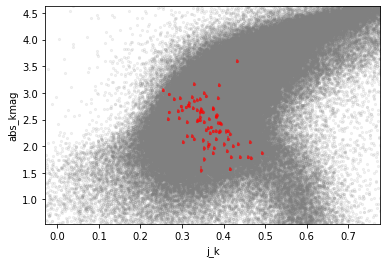

In [16]:
fig, ax = plt.subplots()

kg.plot(x='j_k', y='abs_kmag', color='grey', kind='scatter', marker='.', alpha=0.1, ax=ax)
df.plot(x='j_k', y='abs_kmag', 
        yerr='abs_kmag_err',
        color='r', kind='scatter', marker='.', alpha=0.5, ax=ax)
ax.invert_yaxis()

indent = 1.2 * (df['j_k'].max() - df['j_k'].min())
ax.set_xlim(df['j_k'].min()-indent, df['j_k'].max()+indent)

indent = 0.5 * (df['abs_kmag'].max() - df['abs_kmag'].min())
ax.set_ylim(df['abs_kmag'].min()-indent, df['abs_kmag'].max()+indent)

In [17]:
tracks

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit,frac_evol,gradient
25829,1,0.96,0.28,0.45,1.9,0.160776,0.010687,4941.2060,0.377083,0.839096,4.572537,0.279454,0.034893,0.448981,172.842040,0.034946,0.010687,0.000303
25830,1,0.96,0.28,0.45,1.9,0.182582,0.012137,4942.7075,0.378146,0.839767,4.571843,0.279367,0.034884,0.448808,172.633650,0.034946,0.012137,0.000312
25831,1,0.96,0.28,0.45,1.9,0.208750,0.013876,4944.3150,0.379257,0.840452,4.571134,0.279263,0.034874,0.448600,172.421890,0.034946,0.013876,0.000328
25832,1,0.96,0.28,0.45,1.9,0.240150,0.015963,4945.9937,0.380414,0.841162,4.570401,0.279137,0.034861,0.448351,172.204010,0.034946,0.015963,0.000341
25833,1,0.96,0.28,0.45,1.9,0.277831,0.018468,4947.7300,0.381622,0.841906,4.569634,0.278988,0.034845,0.448053,171.977390,0.034946,0.018468,0.000354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661375,2,0.86,0.28,-0.30,1.9,12.248976,1.248344,5031.6770,3.325142,2.402915,3.609181,0.270006,0.006287,-0.317830,33.672398,0.006473,1.996461,0.000598
9661376,2,0.86,0.28,-0.30,1.9,12.251137,1.248564,5030.4310,3.340762,2.409746,3.606713,0.270098,0.006288,-0.317707,33.525986,0.006473,1.997355,0.000595
9661377,2,0.86,0.28,-0.30,1.9,12.253283,1.248783,5029.2104,3.356451,2.416570,3.604253,0.270192,0.006289,-0.317583,33.380714,0.006473,1.998243,0.000591
9661378,2,0.86,0.28,-0.30,1.9,12.255414,1.249000,5028.0110,3.372206,2.423390,3.601802,0.270287,0.006290,-0.317459,33.236760,0.006473,1.999124,0.000588


In [18]:
tracks.sort_values('star_age', inplace=True)

In [19]:
for group, track in tracks.groupby('initial_mass'):
    print(track)
    break

         evol_stage  initial_mass  initial_Yinit  initial_feh  initial_MLT  \
5404512           1           0.8           0.28         -0.5          1.9   
4194574           1           0.8           0.28         -0.4          1.9   
5404513           1           0.8           0.28         -0.5          1.9   
6968339           1           0.8           0.28         -0.3          1.9   
4194575           1           0.8           0.28         -0.4          1.9   
...             ...           ...            ...          ...          ...   
6755726           3           0.8           0.28          0.5          1.9   
6755727           3           0.8           0.28          0.5          1.9   
6755728           3           0.8           0.28          0.5          1.9   
6755729           3           0.8           0.28          0.5          1.9   
6755730           3           0.8           0.28          0.5          1.9   

          star_age  frac_age  effective_T  luminosity    radius

In [20]:
cond = (tracks['initial_feh']==0.0)
tracks.loc[cond]

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit,frac_evol,gradient
8526306,0,1.20,0.28,0.0,1.9,0.038513,0.010181,6378.1700,2.076233,1.181693,4.372061,0.278462,0.012736,-0.003148,113.359300,0.0128,0.010181,0.000216
8813631,0,1.19,0.28,0.0,1.9,0.040393,0.010404,6349.7354,1.995915,1.169011,4.377799,0.278561,0.012740,-0.002938,115.073555,0.0128,0.010404,0.000202
1925360,0,1.18,0.28,0.0,1.9,0.040855,0.010248,6322.1300,1.917698,1.155905,4.383927,0.278751,0.012749,-0.002532,116.878830,0.0128,0.010248,0.000225
8526307,0,1.20,0.28,0.0,1.9,0.041346,0.010930,6379.3984,2.077059,1.181473,4.372223,0.278211,0.012725,-0.003679,113.378070,0.0128,0.010930,0.000191
4668795,0,1.17,0.28,0.0,1.9,0.042336,0.010350,6293.4460,1.841916,1.143186,4.389842,0.278847,0.012753,-0.002323,118.617290,0.0128,0.010350,0.000223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102163,2,0.80,0.28,0.0,1.9,21.550083,1.216659,4764.3726,2.502400,2.325015,3.606503,0.270586,0.012334,-0.020838,34.048900,0.0128,1.997279,0.000491
2102164,2,0.80,0.28,0.0,1.9,21.552578,1.216800,4764.0500,2.514148,2.330782,3.604348,0.270703,0.012336,-0.020712,33.906460,0.0128,1.997935,0.000500
2102165,2,0.80,0.28,0.0,1.9,21.555056,1.216940,4763.6370,2.526302,2.336814,3.602100,0.270703,0.012336,-0.020712,33.780390,0.0128,1.998587,0.000483
2102166,2,0.80,0.28,0.0,1.9,21.557499,1.217078,4763.4120,2.537565,2.342238,3.600083,0.270939,0.012339,-0.020458,33.653175,0.0128,1.999229,0.000534


In [21]:
df

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e,abs_kmag,abs_kmag_err,j_k,j_k_err
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1,2.726344,0.036664,0.310,0.139431
8,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,0.012941,0,1,0,1.570940,0.046242,0.416,0.135647
10,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,0.017045,0,1,0,2.006930,0.039842,0.423,0.127765
15,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,0.095282,0,1,1,2.688131,0.047885,0.299,0.185583
22,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,0.016897,0,1,1,2.351529,0.035648,0.370,0.124097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,KIC9143749,5735.3600,124.107180,3.361808,0.121795,64.977,1.891,-0.010952,0.071011,4.027943,0.022508,0,1,0,1.956743,0.038488,0.354,0.120171
384,KIC8424992,5517.5083,128.721820,0.985946,0.029900,120.914,0.305,-0.095701,0.074718,4.340031,0.014748,0,1,1,3.166044,0.032298,0.330,0.121824
387,KIC9266926,5781.6396,133.608100,2.231382,0.076240,75.081,1.458,-0.298283,0.071068,4.070394,0.017422,0,1,1,2.436956,0.036332,0.391,0.132064
391,KIC3735871,5960.3850,131.760040,1.366482,0.043845,122.856,0.472,-0.029106,0.075043,4.404094,0.012215,0,1,0,3.049556,0.034136,0.255,0.136854


In [43]:
tracks['frac_age']

5797867    0.010427
2112453    0.010038
2523676    0.010333
4332011    0.010631
1328713    0.010931
             ...   
6755726    1.195770
6755727    1.195872
6755728    1.195965
6755729    1.196054
6755730    1.196141
Name: frac_age, Length: 337721, dtype: float64

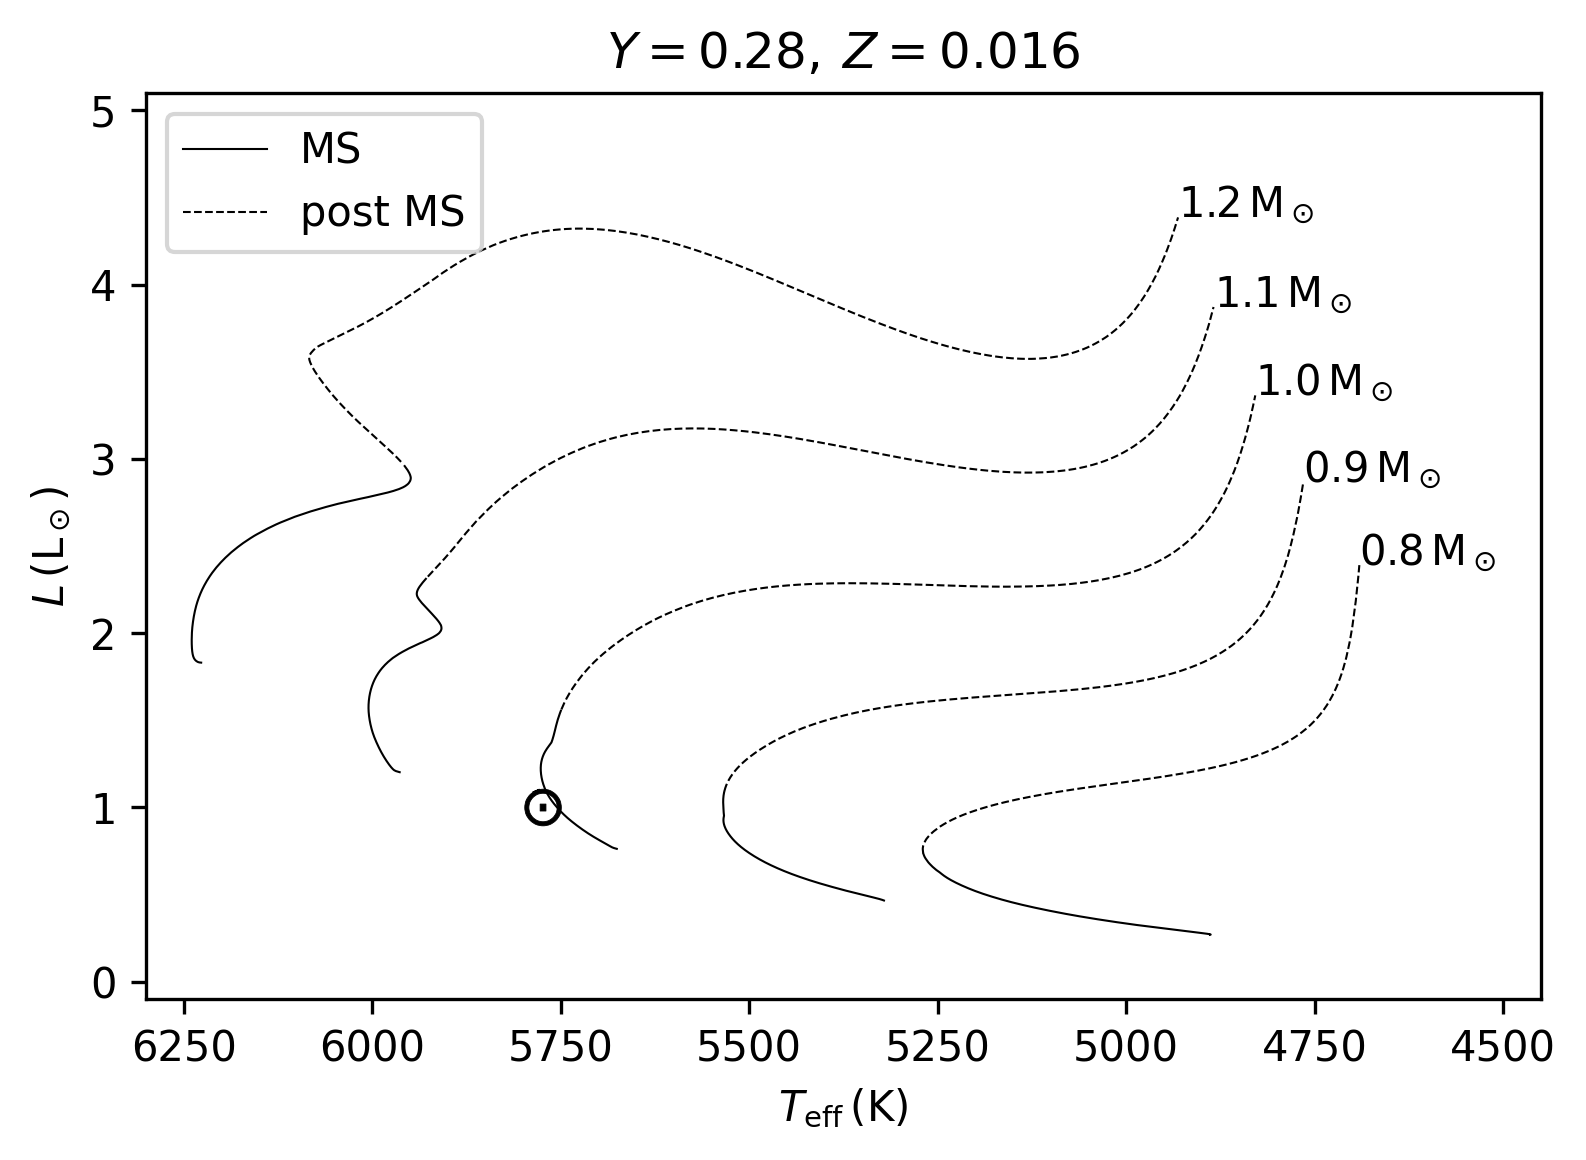

In [53]:
fig, ax = plt.subplots(dpi=300)

feh = 0.1
cond = (tracks['initial_feh']==feh)
masses = [0.8, 0.9, 1.0, 1.1, 1.2]
zx_sun = 0.0181
zx = 10**(feh + np.log10(zx_sun))
y = 0.28
z = (1. - y) / (1 + 1/zx)

for mass in masses:
    new_cond = cond & (tracks['initial_mass']==mass)
#     line = tracks.loc[new_cond, ['effective_T', 'luminosity']].to_numpy().T
    ms = tracks.loc[new_cond & (tracks['frac_age']<1.), ['effective_T', 'luminosity']].to_numpy().T
    pms = tracks.loc[new_cond & (tracks['frac_age']>=1.), ['effective_T', 'luminosity']].to_numpy().T
    msl, = ax.plot(*ms, 'k', linewidth=.5, label='MS')
    pmsl, = ax.plot(*pms, 'k--', linewidth=.5, label='post MS')
    ax.text(*pms[:, -1], f'{mass:.1f}'+r'$\,\mathrm{M}_\odot$', color='k')

ax.plot(5777., 1., 'k', marker=r'$\odot$', markersize=10., markeredgewidth=.2)
ax.set_xlim(4450, 6300)
ax.set_ylim(-0.1, 5.1)
ax.invert_xaxis()
ax.set_title(r'$Y='+f'{y:.2f}'+r',\:Z='+f'{z:.3f}'+'$')

ax.set_xlabel(r'$T_\mathrm{eff}\,(\mathrm{K})$')
ax.set_ylabel(r'$L\,(\mathrm{L}_\odot)$')

ax.legend(handles=[msl, pmsl], loc='upper left')
fig.savefig('../paper/figures/context_tracks.png', bbox_inches='tight')

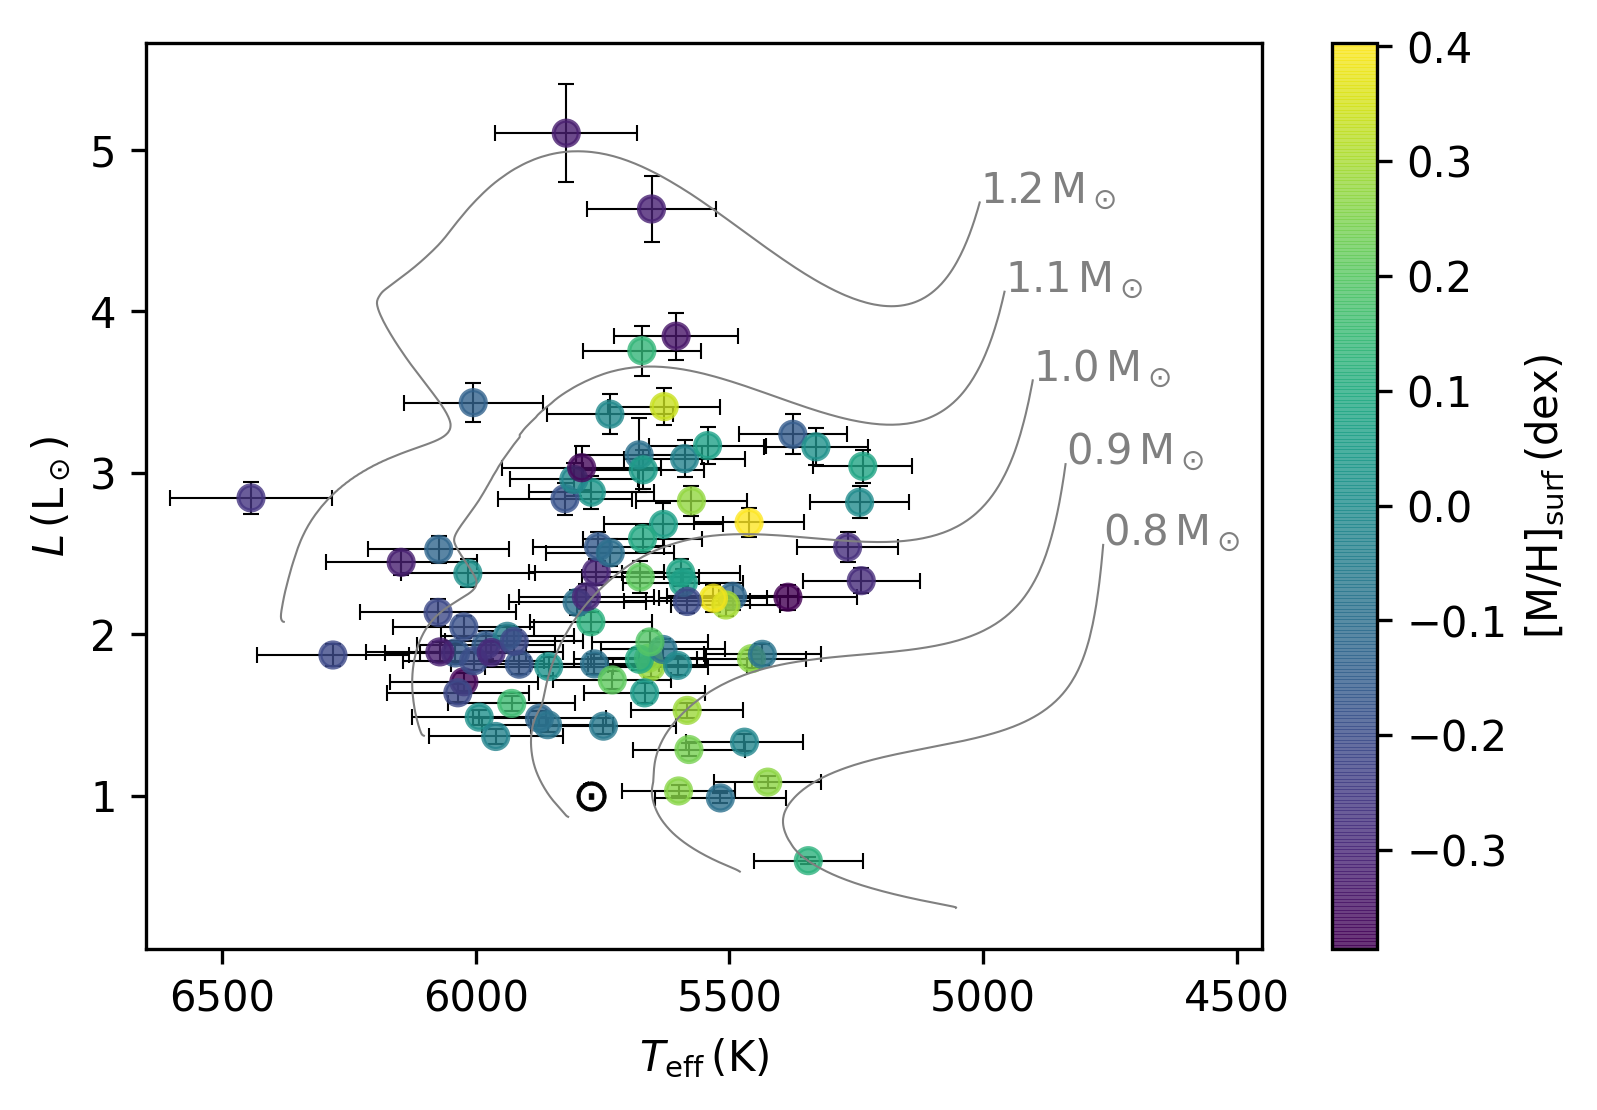

In [100]:
fig, ax = plt.subplots(dpi=300)

cond = (tracks['initial_feh']==feh)
masses = [0.8, 0.9, 1.0, 1.1, 1.2]

for mass in masses:
    new_cond = cond & (tracks['initial_mass']==mass)
    line = tracks.loc[new_cond, ['effective_T', 'luminosity']].to_numpy().T
    ax.plot(*line, 'grey',
           linewidth=.5)
    ax.text(*line[:, -1], f'{mass:.1f}'+r'$\,\mathrm{M}_\odot$', color='grey')

ax.errorbar(*df[['teff', 'lum', 'lum_err', 'teff_err']].to_numpy().T,
            fmt='none', color='k', capsize=2., capthick=.5, linestyle='none', linewidth=.5, zorder=0)

s = ax.scatter(*df[['teff', 'lum']].to_numpy().T, marker='o', c=df['mhs'], cmap='viridis',
          alpha=0.8)
cbar = plt.colorbar(s, label=r'$[\mathrm{M/H}]_\mathrm{surf}\,(\mathrm{dex})$')
# cbar.set_ylabel()

ax.plot(5777., 1., 'k', marker=r'$\odot$', markersize=8., markeredgewidth=.2)
ax.set_xlim(4450, 6650)
ax.invert_xaxis()

ax.set_xlabel(r'$T_\mathrm{eff}\,(\mathrm{K})$')
ax.set_ylabel(r'$L\,(\mathrm{L}_\odot)$')

fig.savefig('../paper/figures/context.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(4.2, 5.2),
                         gridspec_kw={'hspace': 0.08})

ax=axes[0]
tracks[cond].plot(kind='scatter', x='effective_T', y='luminosity',
                  c='star_feh', cmap='viridis', alpha=0.2,
                  marker='.', ax=ax)
df.plot(kind='scatter', x='teff', xerr='teff_err', y='lum', yerr='lum_err',
        c='white', marker='.', alpha=0.5, ax=ax)

cax = fig.get_axes()[-1]
cax.set_ylabel(r'$[\mathrm{M/H}]_\mathrm{surf}\,(\mathrm{dex})$')

ax = axes[1]
tracks[cond].plot(kind='scatter', x='effective_T', y='luminosity',
                  c='initial_mass', cmap='plasma', alpha=0.2,
                  marker='.', ax=ax)
df.plot(kind='scatter', x='teff', xerr='teff_err', y='lum', yerr='lum_err',
        c='white', marker='.', alpha=0.5, ax=ax)

cax = fig.get_axes()[-1]
cax.set_ylabel(r'$M\,(\mathrm{M}_\odot)$')

for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(df.lum.min()-0.1, df.lum.max()+2)
    ax.set_ylabel(r'$L\,(\mathrm{L}_\odot)$')
    ax.set_xlim(df.teff.min()-200, df.teff.max()+200)
    ax.invert_xaxis()
    ax.set_xlabel('')

labels = [item.get_text() for item in axes[0].get_xticklabels()]
axes[0].set_xticklabels(['']*len(labels))
axes[1].set_xlabel(r'$T_\mathrm{eff}\,(\mathrm{K})$');

fig.savefig('../paper/figures/context_grid.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'luminosity $(\\mathrm{L}_\\odot)$')

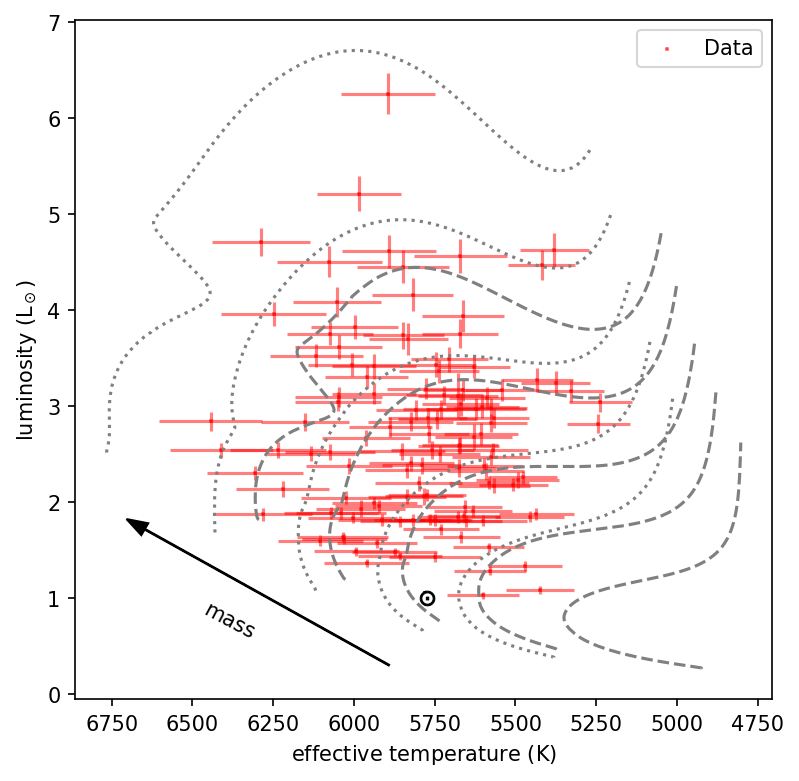

In [39]:
# from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

masses = [0.8, 0.9, 1.0, 1.1, 1.2]

for mass in masses:
    cond1 = grid_cut & (np.isclose(grid['initial_feh'], 0.0)) & np.isclose(ten_grid['log_initial_mass'], mass)
    ten_grid.loc[cond1].plot(kind='line', ax=ax,
        x='log_effective_T', y='log_luminosity',
        linestyle='--', color='grey', label='')
    
    cond2 = grid_cut & (np.isclose(grid['initial_feh'], -0.3)) & np.isclose(ten_grid['log_initial_mass'], mass)
    ten_grid.loc[cond2].plot(kind='line', ax=ax,
        x='log_effective_T', y='log_luminosity', 
        linestyle=':', color='grey', label='')

ax.get_legend().remove()

err_cut = df['dir_lum_err1'] / df['dir_lum'] < 1.
df[err_cut].plot(ax=ax, kind='scatter', x='teff_ISO', y='dir_lum',
                 xerr='teff_err', yerr='dir_lum_err1',
        s=1, c='r', alpha=0.5, marker='s', label='Data')

ax.scatter(5777, 1, marker=r'$\odot$', c='k', s=64, linewidth=0.5)

# ax.set_yscale('log')
ax.text(0.18, 0.09, 'mass', rotation=-28, transform=ax.transAxes)
ax.arrow(0.45, 0.05, -0.35, 0.2, head_width=0.02, facecolor='k', transform=ax.transAxes)
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

# ax.errorbar()
# ax.set_xlim(-0.5, 1.5)
# ax.set_ylim(-5, 6)
# ax.invert_yaxis()
ax.invert_xaxis()
ax.set_xlabel(r'effective temperature $(\mathrm{K})$')
ax.set_ylabel(r'luminosity $(\mathrm{L}_\odot)$')

In [45]:
df.columns

Index(['KIC', 'solution_id', 'designation', 'source_id', 'random_index',
       'gaia_ref_epoch', 'ra_S17', 'ra_error', 'dec_S17', 'dec_error',
       ...
       'dir_mabs', 'dir_mabs_err1', 'dir_mabs_err2', 'dir_mass',
       'dir_mass_err1', 'dir_mass_err2', 'dir_rho', 'dir_rho_err1',
       'dir_rho_err2', 'j_k'],
      dtype='object', length=232)

Text(0, 0.5, 'luminosity $(\\mathrm{L}_\\odot)$')

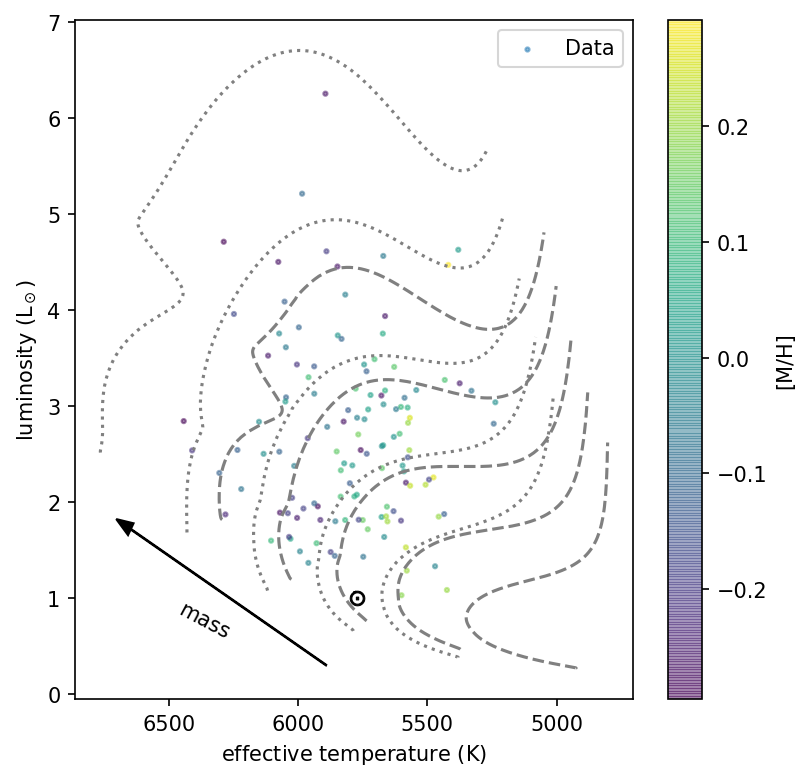

In [49]:
# from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

masses = [0.8, 0.9, 1.0, 1.1, 1.2]

for mass in masses:
    cond1 = grid_cut & (np.isclose(grid['initial_feh'], 0.0)) & np.isclose(ten_grid['log_initial_mass'], mass)
    ten_grid.loc[cond1].plot(kind='line', ax=ax,
        x='log_effective_T', y='log_luminosity',
        linestyle='--', color='grey', label='')
    
    cond2 = grid_cut & (np.isclose(grid['initial_feh'], -0.3)) & np.isclose(ten_grid['log_initial_mass'], mass)
    ten_grid.loc[cond2].plot(kind='line', ax=ax,
        x='log_effective_T', y='log_luminosity', 
        linestyle=':', color='grey', label='')

ax.get_legend().remove()

err_cut = df['dir_lum_err1'] / df['dir_lum'] < 1.
df[err_cut].plot(ax=ax, kind='scatter', x='teff_ISO', y='dir_lum',
#                  xerr='teff_err', yerr='dir_lum_err1',
                 c='[M/H]', cmap='viridis',
                 s=4, alpha=0.5, marker='o', label='Data')

ax.scatter(5777, 1, marker=r'$\odot$', c='k', s=64, linewidth=0.5)

# ax.set_yscale('log')
ax.text(0.18, 0.09, 'mass', rotation=-28, transform=ax.transAxes)
ax.arrow(0.45, 0.05, -0.35, 0.2, head_width=0.02, facecolor='k', transform=ax.transAxes)
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

# ax.errorbar()
# ax.set_xlim(-0.5, 1.5)
# ax.set_ylim(-5, 6)
# ax.invert_yaxis()
ax.invert_xaxis()
ax.set_xlabel(r'effective temperature $(\mathrm{K})$')
ax.set_ylabel(r'luminosity $(\mathrm{L}_\odot)$')

In [50]:
print('Length = ', len(df))

Length =  126
